<a href="https://colab.research.google.com/github/Codi-cia/data-science/blob/main/proyectoElSalvador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTO LIBRERIAS QUE VOY A USAR

In [46]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import sklearn as skl
import random



CARGO ARCHIVOS Y LOS LEO

In [47]:
files.upload()
original15= pd.read_excel("BASE HOMICIDIOS 2015.xlsx")
original16= pd.read_excel("BASE HOMICIDIOS 2016 (1).xlsx")
original17= pd.read_excel("BASE HOMICIDIOS 2017.xlsx")
original18= pd.read_excel("BASE HOMICIDIOS 2018.xlsx")
original19= pd.read_excel("Homicidios_feminicidios_ene-dic_2019.xlsx")
original20= pd.read_excel("Homicidios_feminicidios_Homologados - ene-dic_2020.xlsx")

los archis del 2019 y 2020 tienen un formato diferente asi que tengo que arreglarlo

elimino filas sin datos

In [48]:
original20=original20.drop([1,2,3,0,4],axis=0)



elimino columnas sin datos o datos que no voy a usar

In [49]:
original20=original20.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 7','Unnamed: 11','-'],axis=1)


corrijo el el nombre de las columnas para que todoas tenga el mismo formato

In [50]:
original20=original20.rename(columns={'Unnamed: 2': "DEPARTAMENTO", 'Unnamed: 3': "MUNICIPIO",'Unnamed: 4': "EDAD", 'Unnamed: 5': "SEXO",'Unnamed: 6': 'ARMA UTILIZADA', 'Unnamed: 8': 'DIA','Unnamed: 9': "MES", 'Unnamed: 10': "AÑO"})

aqui hago lo mismo pero con el 2019 ya resumido, desde borrar filas y columnas hasta organizar la columna "DIA"(es lo mismo que el 2020 solo que aqui tengoq ue cambiar el formato)

In [51]:
original19=original19.drop([1,2,3,0,4,5],axis=0)
original19=original19.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 10',],axis=1)
original19=original19.rename(columns={'Unnamed: 2': "DEPARTAMENTO", 'Unnamed: 3': "MUNICIPIO",'Unnamed: 4': "EDAD", 'Unnamed: 5': "SEXO",'Unnamed: 6': 'ARMA UTILIZADA', 'Unnamed: 7': 'DIA','Unnamed: 8': "MES", 'Unnamed: 9': "AÑO"})
original19['DIA'] = pd.to_datetime(original19['DIA'])#aqui cambio el formato
original19["DIA"]=original19.set_index("DIA").index.day_name()
original19['DIA'] = original19['DIA'].map({'Monday':'LUNES','Tuesday':'MARTES','Wednesday':'MIERCOLES','Thursday':'JUEVES','Friday':'VIERNES','Saturday':'SABADO','Sunday':'DOMINGO'},na_action=None)
original19['MES'] = original19['MES'].map({'ENERO':'ENE','FEBRERO':'FEB','MARZO':'MAR','ABRIL':'ABR','MAYO':'MAY','JUNIO':'JUN','JULIO':'JUL','AGOSTO':'AGO','SEPTIEMBRE':'SEP','OCTUBRE':'OCT','NOVIEMBRE':'NOV','DICIEMBRE':'DIC'},na_action=None)


en los archivos nos falta el dia, pero tenemos la fecha en formato (año/mes/dia) asi que con eso podemos saber el dia 

el archivo 2020 ya tiene el formato correcto asi que solo invoco la funcion 

In [52]:
original20["DIA"]=original20.set_index("DIA").index.day_name()

In [53]:
original20

,DEPARTAMENTO,MUNICIPIO,EDAD,SEXO,ARMA UTILIZADA,DIA,MES,AÑO
5,AHUACHAPÁN,AHUACHAPÁN,65,H,OBJETO CONTUNDENTE,Wednesday,ENERO,2020
6,AHUACHAPÁN,ATIQUIZAYA,36,H,ARMA DE FUEGO,Tuesday,ENERO,2020
7,AHUACHAPÁN,GUAYMANGO,24,H,ARMA DE FUEGO,Monday,ENERO,2020
8,AHUACHAPÁN,GUAYMANGO,28,H,ARMA DE FUEGO,Monday,ENERO,2020
9,AHUACHAPÁN,GUAYMANGO,16,H,ARMA DE FUEGO,Monday,ENERO,2020
...,...,...,...,...,...,...,...,...
1341,USULUTÁN,MERCEDES UMAÑA,21,M,ARMA DE FUEGO,Saturday,DICIEMBRE,2020
1342,USULUTÁN,PUERTO EL TRIUNFO,22,H,ARMA DE FUEGO,Tuesday,DICIEMBRE,2020
1343,USULUTÁN,PUERTO EL TRIUNFO,20,H,ARMA DE FUEGO,Friday,DICIEMBRE,2020
1344,USULUTÁN,USULUTÁN,0,H,NO REGISTRADO,Sunday,DICIEMBRE,2020


como quedan en ingles ahora solo cambio los valores a español para mantener el formato uniforme

In [54]:
original20['DIA'] = original20['DIA'].map({'Monday':'LUNES','Tuesday':'MARTES','Wednesday':'MIERCOLES','Thursday':'JUEVES','Friday':'VIERNES','Saturday':'SABADO','Sunday':'DOMINGO'},na_action=None)



In [55]:
original20

,DEPARTAMENTO,MUNICIPIO,EDAD,SEXO,ARMA UTILIZADA,DIA,MES,AÑO
5,AHUACHAPÁN,AHUACHAPÁN,65,H,OBJETO CONTUNDENTE,MIERCOLES,ENERO,2020
6,AHUACHAPÁN,ATIQUIZAYA,36,H,ARMA DE FUEGO,MARTES,ENERO,2020
7,AHUACHAPÁN,GUAYMANGO,24,H,ARMA DE FUEGO,LUNES,ENERO,2020
8,AHUACHAPÁN,GUAYMANGO,28,H,ARMA DE FUEGO,LUNES,ENERO,2020
9,AHUACHAPÁN,GUAYMANGO,16,H,ARMA DE FUEGO,LUNES,ENERO,2020
...,...,...,...,...,...,...,...,...
1341,USULUTÁN,MERCEDES UMAÑA,21,M,ARMA DE FUEGO,SABADO,DICIEMBRE,2020
1342,USULUTÁN,PUERTO EL TRIUNFO,22,H,ARMA DE FUEGO,MARTES,DICIEMBRE,2020
1343,USULUTÁN,PUERTO EL TRIUNFO,20,H,ARMA DE FUEGO,VIERNES,DICIEMBRE,2020
1344,USULUTÁN,USULUTÁN,0,H,NO REGISTRADO,DOMINGO,DICIEMBRE,2020


una correcion en el formato de los meses del año para que todos los dataframes tenga el mismo formato

In [56]:
original20['MES'] = original20['MES'].map({'ENERO':'ENE','FEBRERO':'FEB','MARZO':'MAR','ABRIL':'ABR','MAYO':'MAY','JUNIO':'JUN','JULIO':'JUL','AGOSTO':'AGO','SEPTIEMBRE':'SEP','OCTUBRE':'OCT','NOVIEMBRE':'NOV','DICIEMBRE':'DIC'},na_action=None)

UNA PEQUEÑA REVISION DE TODOS LOS ARCHIVOS CARGADOS

In [57]:
original15.columns
#original16.head()
#original17.head()
#original18.head()


Index(['CUENTA', 'DEPARTAMENTO', 'MUNICIPIO', 'EDAD', 'SEXO', 'ARMA UTILIZADA',
       'DIA', 'MES ', 'AÑO '],
      dtype='object')

EN LA REVISION ME DOY CUENTA QUE MES Y AÑO DEL ARCHIVO 15 TIENEN UN ESPACIO EXTRA ASI QUE DECIDO CAMBIARLO PARA QUE TODOS LOS ARCHIVOS TENGAN LAS MISMAS ETIQUETAS

In [58]:
original15=original15.rename(columns={"MES ": "MES", "AÑO ": "AÑO"})


AQUI REVISO QUE ESE ESPACIO YA NO EXISTA 

In [59]:
original15.columns


Index(['CUENTA', 'DEPARTAMENTO', 'MUNICIPIO', 'EDAD', 'SEXO', 'ARMA UTILIZADA',
       'DIA', 'MES', 'AÑO'],
      dtype='object')

USO CONCAT PARA UNIR TODOS LOS ARCHIVOS, EN ORDEN DE AÑO

In [60]:
original=pd.concat([original15,original16,original17,original18,original19,original20],ignore_index=True)

In [61]:
original=original.drop(['CUENTA'],axis=1)

In [62]:
original

,DEPARTAMENTO,MUNICIPIO,EDAD,SEXO,ARMA UTILIZADA,DIA,MES,AÑO
0,AHUACHAPAN,EL REFUGIO,18,M,ARMA DE FUEGO,JUEVES,ENE,2015
1,AHUACHAPAN,JUJUTLA,14,M,ARMA DE FUEGO,LUNES,ENE,2015
2,AHUACHAPAN,ATIQUIZAYA,33,H,ARMA DE FUEGO,MIERCOLES,ENE,2015
3,AHUACHAPAN,AHUACHAPAN,30,H,ARMA DE FUEGO,VIERNES,ENE,2015
4,AHUACHAPAN,SAN FRANCISCO MENENDEZ,24,H,ARMA DE FUEGO,VIERNES,ENE,2015
...,...,...,...,...,...,...,...,...
22977,USULUTÁN,MERCEDES UMAÑA,21,M,ARMA DE FUEGO,SABADO,DIC,2020
22978,USULUTÁN,PUERTO EL TRIUNFO,22,H,ARMA DE FUEGO,MARTES,DIC,2020
22979,USULUTÁN,PUERTO EL TRIUNFO,20,H,ARMA DE FUEGO,VIERNES,DIC,2020
22980,USULUTÁN,USULUTÁN,0,H,NO REGISTRADO,DOMINGO,DIC,2020


FALTAN ALGUNOS DATOS EN LA EDAD ASI QUE DECIDO LLENARLOS CON LA MEDIA GENERAL, 

In [63]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer0 = SimpleImputer(missing_values=0.0, strategy='mean')

EDAD ES UNA ETIQUETA DE INIT, Y LOS DATOS QUE FALTAN ESTAN MARCADOS COMO "ND" ASI QUE TODO LO QUE NO SEA NUMERICO LO CONVIERTO EN NaN

In [64]:
original['EDAD'] = pd.to_numeric(original['EDAD'],errors='coerce')


CAMBIO LOS DATOS NaN DE LA ETIQUETE "EDAD" POR LA MEDIA, PARA LOS ND USO IMPUTER Y PARA LOS 0.0 USO IMPUTER0

In [65]:
original['EDAD'] = imputer.fit_transform(original["EDAD"].values.reshape(-1, 1))
original['EDAD'] = imputer0.fit_transform(original["EDAD"].values.reshape(-1, 1))

In [66]:
original

,DEPARTAMENTO,MUNICIPIO,EDAD,SEXO,ARMA UTILIZADA,DIA,MES,AÑO
0,AHUACHAPAN,EL REFUGIO,18.000000,M,ARMA DE FUEGO,JUEVES,ENE,2015
1,AHUACHAPAN,JUJUTLA,14.000000,M,ARMA DE FUEGO,LUNES,ENE,2015
2,AHUACHAPAN,ATIQUIZAYA,33.000000,H,ARMA DE FUEGO,MIERCOLES,ENE,2015
3,AHUACHAPAN,AHUACHAPAN,30.000000,H,ARMA DE FUEGO,VIERNES,ENE,2015
4,AHUACHAPAN,SAN FRANCISCO MENENDEZ,24.000000,H,ARMA DE FUEGO,VIERNES,ENE,2015
...,...,...,...,...,...,...,...,...
22977,USULUTÁN,MERCEDES UMAÑA,21.000000,M,ARMA DE FUEGO,SABADO,DIC,2020
22978,USULUTÁN,PUERTO EL TRIUNFO,22.000000,H,ARMA DE FUEGO,MARTES,DIC,2020
22979,USULUTÁN,PUERTO EL TRIUNFO,20.000000,H,ARMA DE FUEGO,VIERNES,DIC,2020
22980,USULUTÁN,USULUTÁN,31.401346,H,NO REGISTRADO,DOMINGO,DIC,2020


SEPARO LAS COLUMNAS DE TEXTO DE LAS COLUMNAS NUMERICAS PARA FACILITAR EL TRABAJO

In [67]:
columnas_numericas=(original.dtypes == float) | (original.dtypes == int)
num_col=[c for c in columnas_numericas.index if columnas_numericas[c]]
num=original[num_col]
columnas_texto=original.dtypes == object
text_col=[c for c in columnas_texto.index if columnas_texto[c]]
text=original[text_col]

REVISO QUE EN LAS COLUMNAS DE TEXTO NO HALLAN ERRORES DE DIGITACION

In [68]:
freq = text['MUNICIPIO'].value_counts() 
print(freq)

SAN SALVADOR              1650
SAN MIGUEL                 909
SOYAPANGO                  796
APOPA                      688
MEJICANOS                  584
                          ... 
YOLOAYQUIN                   1
SAN ISIDRO MO                1
SAN ANTONIO DE LA CRUZ       1
OJOS DE AGUA                 1
SANTA MARÍA                  1
Name: MUNICIPIO, Length: 326, dtype: int64


encuentro algunas que se repiten entonces procedo a organizarlas

FuzzyWuzzy es una libreria que permite corregir datos ingresados por humanos

In [69]:
pip install fuzzywuzzy


añado una lista de coo deberia estar escrito y lo que ella hace s comparar todas las entradas con las que yo le di y escoger la mas parecido

In [70]:
from fuzzywuzzy import process

n corregidas[] voy a agregar todos los municipios que fuzzywuzzy encontro que ran los correctos

In [71]:
corregidas=[]
for i in original['MUNICIPIO']:
  x=process.extractOne(i,('AHUACHAPAN', 'CABAÑAS', 'CHALATENANGO', 'CUSCATLAN',
       'LA LIBERTAD', 'LA PAZ', 'LA UNION', 'MORAZAN', 'SAN MIGUEL',
       'SAN SALVADOR', 'SAN VICENTE', 'SANTA ANA', 'SONSONATE',
       'USULUTAN'))
  corregidas.append(x[0])


depues creo un dataframe con las correcciones y cambio esta lista con los departamentos de mi dataframe original 

In [72]:
corregidas=pd.Series(corregidas)
original['DEPARTAMENTO']=corregidas

reviso que no hallan mas errores

In [73]:
freq = text['DEPARTAMENTO'].value_counts() 
print(freq)

SAN SALVADOR    6956
LA LIBERTAD     2413
SAN MIGUEL      1987
SONSONATE       1715
SANTA ANA       1692
USULUTAN        1603
LA PAZ          1336
CUSCATLAN       1190
AHUACHAPAN       746
LA UNION         745
SAN VICENTE      630
MORAZAN          537
CABAÑAS          514
CHALATENANGO     379
AHUACHAPAN       199
AHUACHAPÁN        86
USULUTÁN          78
LA UNIÓN          68
CUSCATLÁN         63
MORAZÁN           45
Name: DEPARTAMENTO, dtype: int64


aqui uso la hoja ya organizada 

In [74]:
#files.upload()


In [75]:
#original= pd.read_csv("proyecto_salvador_unificado.csv")

una pequeña revision de como estan las edades

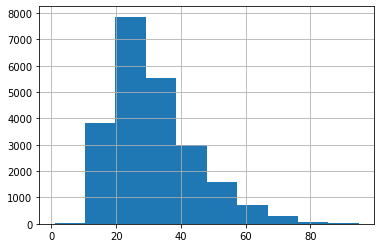

In [76]:
original['EDAD'].hist()

voy a hacer un primer analisis sobre los departamentos y el sexo en los homicidios 

hago las frecuencias de ambos 

In [77]:
frecuenciaS= 100 * original['SEXO'].value_counts() / len(original['SEXO'])
frecuenciaS
frecuenciaD=100 * original['DEPARTAMENTO'].value_counts() / len(original['DEPARTAMENTO'])
frecuenciaD

SAN SALVADOR    16.465060
SANTA ANA       13.454007
SAN MIGUEL      13.288661
AHUACHAPAN       8.602384
CHALATENANGO     8.210774
CABAÑAS          7.584196
CUSCATLAN        6.061265
SONSONATE        5.177965
LA UNION         4.982160
MORAZAN          4.803759
USULUTAN         4.320773
LA PAZ           3.541902
LA LIBERTAD      2.036376
SAN VICENTE      1.470716
Name: DEPARTAMENTO, dtype: float64

en graficas todo se ve mejor 

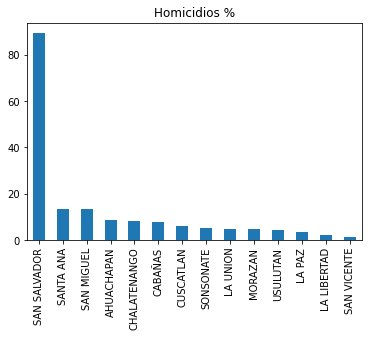

In [78]:
plotS = (100 * original['SEXO'].value_counts() / len(original['SEXO'])).plot(kind='bar', title='Homicidios %')

plotD = (100 * original['DEPARTAMENTO'].value_counts() / len(original['DEPARTAMENTO'])).plot(kind='bar', title='Homicidios %')

y hago una pequeña tabla con el sexo de los homicidios y en que departamento fueron 

In [79]:
pd.crosstab(index=original['SEXO'],columns=original['DEPARTAMENTO'], margins=True)

DEPARTAMENTO,AHUACHAPAN,CABAÑAS,CHALATENANGO,CUSCATLAN,LA LIBERTAD,LA PAZ,LA UNION,MORAZAN,SAN MIGUEL,SAN SALVADOR,SAN VICENTE,SANTA ANA,SONSONATE,USULUTAN,All
SEXO,,,,,,,,,,,,,,,
H,1737,1588,1690,1236,423,732,1023,977,2704,3347,312,2777,1084,907,20537
M,228,150,170,147,41,77,113,124,341,421,26,303,92,82,2315
ND,12,5,27,10,4,5,9,3,9,16,0,12,14,4,130
All,1977,1743,1887,1393,468,814,1145,1104,3054,3784,338,3092,1190,993,22982


su porcentage relativo

In [80]:
pd.crosstab(index=original['SEXO'], columns=original['DEPARTAMENTO'],
            margins=True).apply(lambda r: r/len(original) *100,
                                axis=1)

DEPARTAMENTO,AHUACHAPAN,CABAÑAS,CHALATENANGO,CUSCATLAN,LA LIBERTAD,LA PAZ,LA UNION,MORAZAN,SAN MIGUEL,SAN SALVADOR,SAN VICENTE,SANTA ANA,SONSONATE,USULUTAN,All
SEXO,,,,,,,,,,,,,,,
H,7.558089,6.909755,7.353581,5.378122,1.840571,3.185101,4.451310,4.251153,11.765730,14.563571,1.357584,12.083370,4.716735,3.946567,89.361239
M,0.992081,0.652685,0.739709,0.639631,0.178400,0.335045,0.491689,0.539553,1.483770,1.831868,0.113132,1.318423,0.400313,0.356801,10.073101
ND,0.052215,0.021756,0.117483,0.043512,0.017405,0.021756,0.039161,0.013054,0.039161,0.069620,0.000000,0.052215,0.060917,0.017405,0.565660
All,8.602384,7.584196,8.210774,6.061265,2.036376,3.541902,4.982160,4.803759,13.288661,16.465060,1.470716,13.454007,5.177965,4.320773,100.000000


y en esta tabla vemos el porcentage total de hombre y mujeres 

In [81]:
pd.crosstab(index=original['SEXO'], columns=original['DEPARTAMENTO']).apply(lambda r: r/r.sum() *100,axis=1)

DEPARTAMENTO,AHUACHAPAN,CABAÑAS,CHALATENANGO,CUSCATLAN,LA LIBERTAD,LA PAZ,LA UNION,MORAZAN,SAN MIGUEL,SAN SALVADOR,SAN VICENTE,SANTA ANA,SONSONATE,USULUTAN
SEXO,,,,,,,,,,,,,,
H,8.457905,7.732385,8.229050,6.018406,2.059697,3.564299,4.981253,4.757267,13.166480,16.297414,1.519209,13.521936,5.278278,4.416419
M,9.848812,6.479482,7.343413,6.349892,1.771058,3.326134,4.881210,5.356371,14.730022,18.185745,1.123110,13.088553,3.974082,3.542117
ND,9.230769,3.846154,20.769231,7.692308,3.076923,3.846154,6.923077,2.307692,6.923077,12.307692,0.000000,9.230769,10.769231,3.076923


lo grafico

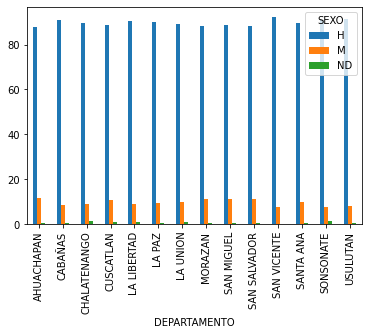

In [82]:
plot = pd.crosstab(index=original['DEPARTAMENTO'],columns=original['SEXO']).apply(lambda r: r/r.sum() *100,axis=1).plot(kind='bar')

por si quieren descargar el scv ya corregido

In [83]:
#original.to_csv("proyecto_salvador_unificado.csv")
#files.download("proyecto_salvador_unificado.csv")

In [84]:
from sklearn.cluster import KMeans

In [86]:
original.head()

,DEPARTAMENTO,MUNICIPIO,EDAD,SEXO,ARMA UTILIZADA,DIA,MES,AÑO
0,LA UNION,EL REFUGIO,18.0,M,ARMA DE FUEGO,JUEVES,ENE,2015
1,USULUTAN,JUJUTLA,14.0,M,ARMA DE FUEGO,LUNES,ENE,2015
2,SANTA ANA,ATIQUIZAYA,33.0,H,ARMA DE FUEGO,MIERCOLES,ENE,2015
3,AHUACHAPAN,AHUACHAPAN,30.0,H,ARMA DE FUEGO,VIERNES,ENE,2015
4,SAN MIGUEL,SAN FRANCISCO MENENDEZ,24.0,H,ARMA DE FUEGO,VIERNES,ENE,2015


In [88]:
originalfit=original.drop(['MUNICIPIO'],axis=1)


In [89]:
originalfit.tail()

,DEPARTAMENTO,EDAD,SEXO,ARMA UTILIZADA,DIA,MES,AÑO
22977,MORAZAN,21.000000,M,ARMA DE FUEGO,SABADO,DIC,2020
22978,LA UNION,22.000000,H,ARMA DE FUEGO,MARTES,DIC,2020
22979,LA UNION,20.000000,H,ARMA DE FUEGO,VIERNES,DIC,2020
22980,USULUTAN,31.401346,H,NO REGISTRADO,DOMINGO,DIC,2020
22981,USULUTAN,30.000000,M,ARMA DE FUEGO,MARTES,DIC,2020


In [90]:
originalfit['AÑO'] = originalfit['AÑO'].map({2015:"2015",2016:"2016",2017:'2017',2018:'2018',2019:'2019',2020:'2020'},na_action=None)


In [91]:
i=0
for n in originalfit['EDAD']:
 if n <= 5:
   originalfit['EDAD'][i]="PRIMERA INFANCIA"
 if n <= 11 and n>5:
   originalfit['EDAD'][i]="INFANCIA"
 if n <= 18 and n>11:
   originalfit['EDAD'][i]="ADOLESCENCIA" 
 if n <= 26 and n>18:
   originalfit['EDAD'][i]="JUVENTUD" 
 if n <= 59 and n>26:
   originalfit['EDAD'][i]="ADULTEZ" 
 if n >= 59 :
    originalfit['EDAD'][i]="VEJEZ"    
 i=i+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [92]:
originalfit=pd.get_dummies(originalfit[["DIA","MES","ARMA UTILIZADA","SEXO","DEPARTAMENTO","AÑO","EDAD"]])

In [93]:
originalfit.head()

,DIA_DOMINGO,DIA_JUEVES,DIA_LUNES,DIA_MARTES,DIA_MIERCOLES,DIA_SABADO,DIA_VIERNES,MES_ABR,MES_AGO,MES_DIC,...,AÑO_2017,AÑO_2018,AÑO_2019,AÑO_2020,EDAD_ADOLESCENCIA,EDAD_ADULTEZ,EDAD_INFANCIA,EDAD_JUVENTUD,EDAD_PRIMERA INFANCIA,EDAD_VEJEZ
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


normalizacion de datos

In [94]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/x.std(), axis=0)




In [95]:
pip install kmodes

In [96]:
from kmodes.kprototypes import KPrototypes


In [97]:
kproto = KPrototypes(n_clusters=2, verbose=2, max_iter=20)


Initialization method and algorithm are deterministic. Setting n_init to 1.


In [98]:
GRUPO=['EDAD']

In [99]:
original_datosnumericos=original[GRUPO]

In [100]:
original_datosnumericos=original_datosnumericos.apply(lambda x: (round(x)))

In [101]:
original_datosnumericos['EDAD'].unique()

array([18., 14., 33., 30., 24., 50., 48., 20., 15., 31., 35., 26., 43.,
       51., 34., 19., 22., 25., 32., 16., 44., 17., 21., 29., 36., 23.,
       40., 42., 37., 59., 80., 47., 38., 45., 41., 28., 27., 63., 46.,
       49., 58., 60., 52., 57., 12., 64., 39., 65., 89., 56., 13., 68.,
       62., 53., 55., 61.,  1., 54., 69., 72., 74., 66.,  6., 79., 77.,
       70., 86., 75., 67.,  9., 10., 82., 73.,  3., 76., 71.,  5., 83.,
       85.,  2., 84., 78., 93., 11.,  7.,  8., 81., 90.,  4., 94., 87.,
       88., 91., 95.])

In [102]:
original_datosnumericos=original_datosnumericos.sort_values(by=["EDAD"])

In [103]:
prueba=mean_norm(original_datosnumericos)

In [104]:
prueba.head()

,EDAD
348,-2.35193
21311,-2.35193
19457,-2.35193
22554,-2.35193
9574,-2.35193


In [105]:
pip install --upgrade kmodes

In [106]:
from kmodes.kmodes import KModes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 128972.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 128972.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 128972.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 128972.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 128972.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7448, cost: 114756.0
Run 1, iteration: 2/100, moves: 1423, cost: 114756.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4789, cost: 114756.0
Init: ini

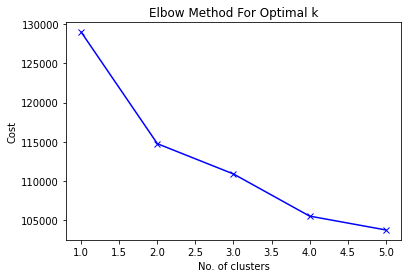

In [107]:
cost = []
K = range(1,6)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(originalfit)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

4 clusters

In [108]:
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(originalfit)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9450, cost: 107848.0
Run 1, iteration: 2/100, moves: 918, cost: 107848.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8119, cost: 108638.0
Run 2, iteration: 2/100, moves: 5007, cost: 106975.0
Run 2, iteration: 3/100, moves: 252, cost: 106975.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7194, cost: 104943.0
Run 3, iteration: 2/100, moves: 1070, cost: 104943.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 13306, cost: 107848.0
Run 4, iteration: 2/100, moves: 5772, cost: 107848.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 9382, cost: 112657.0
Run 5, iteration: 2/100, moves: 305, cost: 112657.0
Best run was number

array([3, 3, 0, ..., 2, 1, 1], dtype=uint16)

In [109]:
originalfit2=originalfit

In [110]:
originalfit2.insert(0, "Cluster", clusters, True)


In [111]:
originalfit2

,Cluster,DIA_DOMINGO,DIA_JUEVES,DIA_LUNES,DIA_MARTES,DIA_MIERCOLES,DIA_SABADO,DIA_VIERNES,MES_ABR,MES_AGO,...,AÑO_2017,AÑO_2018,AÑO_2019,AÑO_2020,EDAD_ADOLESCENCIA,EDAD_ADULTEZ,EDAD_INFANCIA,EDAD_JUVENTUD,EDAD_PRIMERA INFANCIA,EDAD_VEJEZ
0,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22977,2,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
22978,2,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
22979,2,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
22980,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [112]:
print(kmode.cluster_centroids_)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]]


In [113]:
originalfit

,Cluster,DIA_DOMINGO,DIA_JUEVES,DIA_LUNES,DIA_MARTES,DIA_MIERCOLES,DIA_SABADO,DIA_VIERNES,MES_ABR,MES_AGO,...,AÑO_2017,AÑO_2018,AÑO_2019,AÑO_2020,EDAD_ADOLESCENCIA,EDAD_ADULTEZ,EDAD_INFANCIA,EDAD_JUVENTUD,EDAD_PRIMERA INFANCIA,EDAD_VEJEZ
0,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22977,2,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
22978,2,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
22979,2,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
22980,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [114]:
original

,DEPARTAMENTO,MUNICIPIO,EDAD,SEXO,ARMA UTILIZADA,DIA,MES,AÑO
0,LA UNION,EL REFUGIO,18.000000,M,ARMA DE FUEGO,JUEVES,ENE,2015
1,USULUTAN,JUJUTLA,14.000000,M,ARMA DE FUEGO,LUNES,ENE,2015
2,SANTA ANA,ATIQUIZAYA,33.000000,H,ARMA DE FUEGO,MIERCOLES,ENE,2015
3,AHUACHAPAN,AHUACHAPAN,30.000000,H,ARMA DE FUEGO,VIERNES,ENE,2015
4,SAN MIGUEL,SAN FRANCISCO MENENDEZ,24.000000,H,ARMA DE FUEGO,VIERNES,ENE,2015
...,...,...,...,...,...,...,...,...
22977,MORAZAN,MERCEDES UMAÑA,21.000000,M,ARMA DE FUEGO,SABADO,DIC,2020
22978,LA UNION,PUERTO EL TRIUNFO,22.000000,H,ARMA DE FUEGO,MARTES,DIC,2020
22979,LA UNION,PUERTO EL TRIUNFO,20.000000,H,ARMA DE FUEGO,VIERNES,DIC,2020
22980,USULUTAN,USULUTÁN,31.401346,H,NO REGISTRADO,DOMINGO,DIC,2020
